In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

housing.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


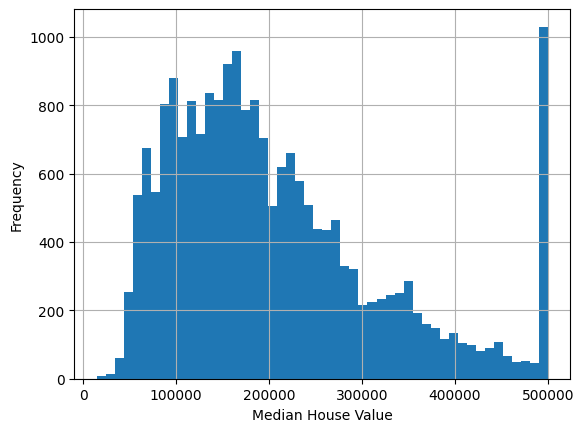

In [4]:
plt.figure()
housing["median_house_value"].hist(bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


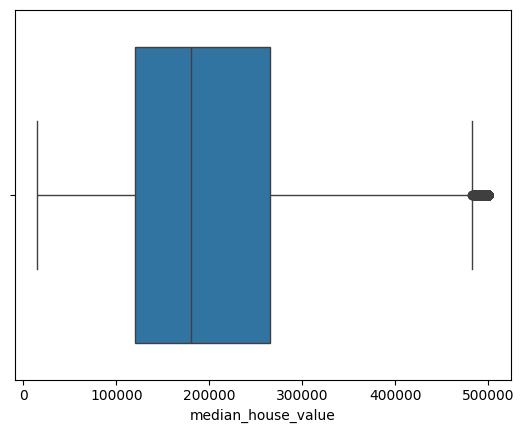

In [5]:
plt.figure()
sns.boxplot(x=housing["median_house_value"])
plt.show()


In [6]:
missing_percentage = housing.isnull().mean() * 100
missing_percentage


,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


In [8]:
imputer = SimpleImputer(strategy="median")
housing["total_bedrooms"] = imputer.fit_transform(
    housing[["total_bedrooms"]]
)


In [9]:
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])
housing_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [10]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

num_features = housing_encoded.drop("median_house_value", axis=1)

housing_scaled = minmax_scaler.fit_transform(num_features)

housing_scaled = pd.DataFrame(
    housing_scaled, columns=num_features.columns
)

housing_scaled.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0


In [11]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]


In [15]:
corr_matrix = housing_encoded.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
ocean_proximity_ISLAND,0.023416


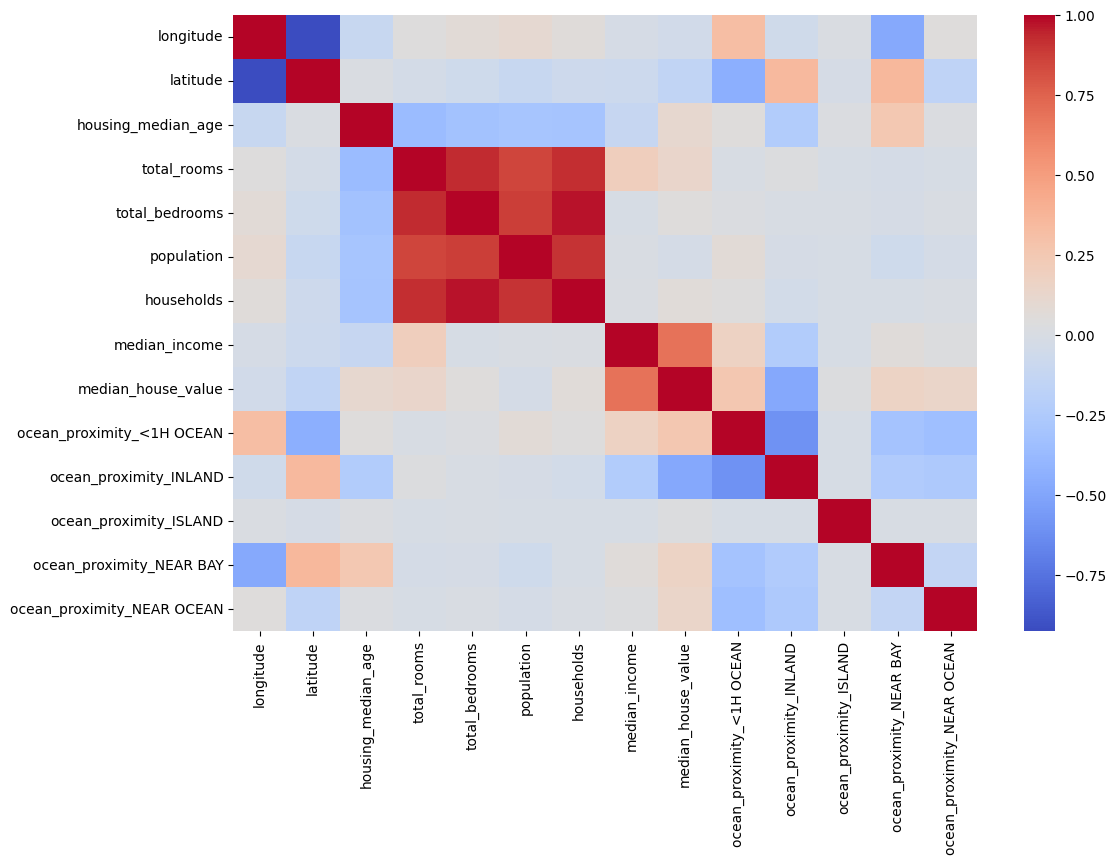

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


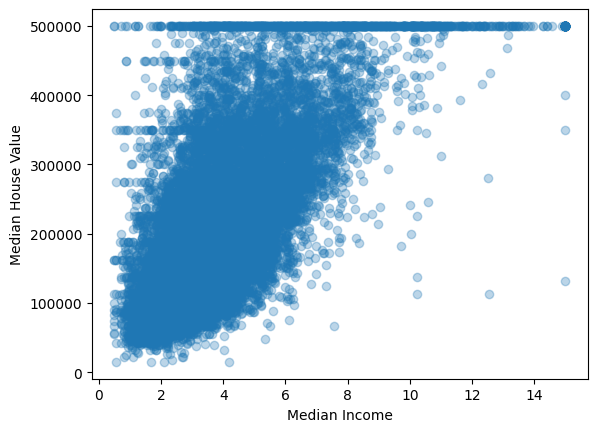

In [17]:
plt.figure()
plt.scatter(
    housing["median_income"],
    housing["median_house_value"],
    alpha=0.3
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [18]:
train_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=42
)


In [19]:
corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)

top_3_positive = corr_target[1:4]
most_negative = corr_target.tail(1)

top_3_positive, most_negative


(median_income                0.688075
 ocean_proximity_<1H OCEAN    0.256617
 ocean_proximity_NEAR BAY     0.160284
 Name: median_house_value, dtype: float64,
 ocean_proximity_INLAND   -0.484859
 Name: median_house_value, dtype: float64)

In [20]:
scaler = StandardScaler()

num_cols = housing.select_dtypes(include=[np.number]).columns
housing[num_cols] = scaler.fit_transform(housing[num_cols])


In [22]:
X = housing_scaled
y = housing_encoded["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


(np.float64(70060.52184473518), 50670.7382409719, 0.6254240620553606)